In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("./HospitalAdmissionsData.csv")

In [4]:
for col in df.columns:
    print(col)

ID
AdmissionLengthDays
Death_1
Admission_Type
Insurance_Type
EnglishLanguage_1
Religion_Type
Married_1
Race
Dx


In [5]:
for item in list(df.columns):
    print(item, ": ", type(df.loc[0,item]))

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [7]:
print(list(df["Insurance_Type"].unique()))

<bound method Series.count of ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
dtype: object>

In [9]:
df.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [10]:
df.groupby('Admission_Type').count().idxmax()
df.groupby('Insurance_Type').count().idxmax()
df.groupby('Religion_Type').count().idxmax()
df.groupby('Race').count().idxmax()
df.groupby('Dx').count().idxmax()

ID                     newborn
AdmissionLengthDays    newborn
Death_1                newborn
Admission_Type         newborn
Insurance_Type         newborn
EnglishLanguage_1      newborn
Religion_Type          newborn
Married_1              newborn
Race                   newborn
dtype: object

Text(0, 0.5, 'Frequency (people)')

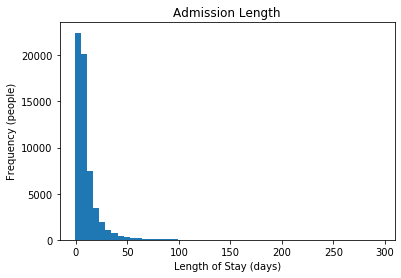

In [13]:
ax = df['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50)
ax.set_title("Admission Length")
ax.set_xlabel("Length of Stay (days)")
ax.set_ylabel("Frequency (people)")

Text(0, 0.5, 'Frequency (people)')

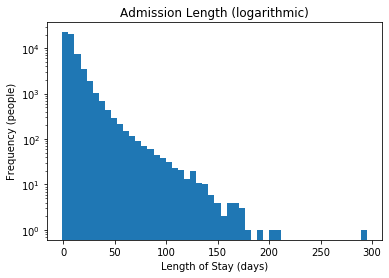

In [14]:
ax = df['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50, log=True)
ax.set_title("Admission Length (logarithmic)")
ax.set_xlabel("Length of Stay (days)")
ax.set_ylabel("Frequency (people)")

In [15]:
print("Average length of stay for non-survivors")
print(df[df["Death_1"] == 1]['AdmissionLengthDays'].mean())
print("Average length of stay for survivors")
print(df[df["Death_1"] == 0]['AdmissionLengthDays'].mean())

Average length of stay for non-survivors
10.129605856532672
Average length of stay for survivors
10.140012332344613


Text(0, 0.5, 'Frequency (people)')

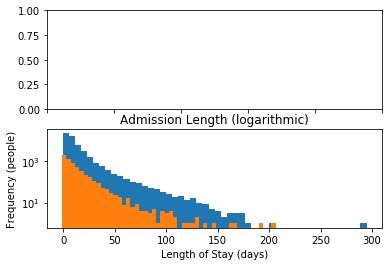

In [18]:
fig, ax = plt.subplots(2)
ax[0] = df[df["Death_1"] == 0]['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50, log=True)
ax[1] = df[df["Death_1"] == 1]['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50, log=True)

ax[0].set_title("Admission Length (logarithmic)")
ax[0].set_xlabel("Length of Stay (days)")
ax[0].set_ylabel("Frequency (people)")

In [19]:
df.groupby("Insurance_Type")["Death_1"]

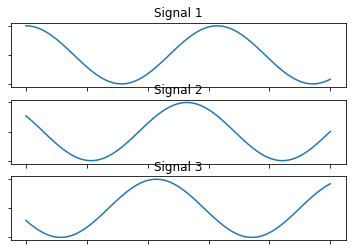

In [23]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

fig, axs = plt.subplots(3)
axs[0].plot(x, y1)
axs[1].plot(x, y2)
axs[2].plot(x, y3)
for i in range(3):
    axs[i].set_xticklabels("")
    axs[i].set_yticklabels("")
    axs[i].set_title(names[i])